## 例題

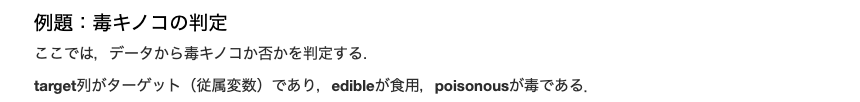

In [1]:
from IPython.display import Image
Image('poisonous-mushroom.png')

## 解答

In [2]:
import pandas as pd
import numpy as np

In [3]:
mashroom = pd.read_csv("http://logopt.com/data/mashroom.csv")
mashroom.head()

,target,shape,surface,color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [4]:
mashroom.color.unique()

array(['yellow', 'white', 'gray', 'brown', 'red', 'pink', 'buff',
       'purple', 'cinnamon', 'green'], dtype=object)

In [5]:
X = mashroom.drop("target", axis=1)
y = mashroom.target
X

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


### 前処理

In [6]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
np.unique(y)

array([0, 1])

In [7]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

X_ohe = OneHotEncoder(sparse=False).fit_transform(X)
print(X_ohe)
print(X_ohe.shape)

[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(8123, 20)


In [8]:
n_shapes = len(X['shape'].unique())
n_surfaces = len(X['surface'].unique())
n_colors = len(X['color'].unique())
print(
    f'shape: {n_shapes} categories',
    f'surface: {n_surfaces} categories',
    f'color: {n_colors} categories',
    f'total: {n_shapes + n_surfaces + n_colors}',
    sep='\n'
)

shape: 6 categories
surface: 4 categories
color: 10 categories
total: 20


In [9]:
oe = OrdinalEncoder()
X_oe = oe.fit_transform(X)
print(X_oe, '\n', sep='')
print(oe.categories_)

[[2. 3. 9.]
 [0. 3. 8.]
 [2. 2. 8.]
 ...
 [3. 3. 0.]
 [4. 2. 0.]
 [2. 3. 0.]]

[array(['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'],
      dtype=object), array(['fibrous', 'grooves', 'scaly', 'smooth'], dtype=object), array(['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple',
       'red', 'white', 'yellow'], dtype=object)]


In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(X_ohe, y)
logreg.score(X_ohe, y)

0.6647790225286224

In [11]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_oe, y)
logreg.score(X_oe, y)

0.6088883417456604